In [25]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

data = pd.read_csv('C:/Users/Administrator/Downloads/big5/IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [26]:
big_five_data = data.copy()

big_five_data.drop(big_five_data.columns[50:107], axis=1, inplace=True)
big_five_data.drop(big_five_data.columns[51:], axis=1, inplace=True)
big_five_data.dropna(inplace=True)
big_five_data.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [27]:
#note: 
#EXT - Extraversion
#EST - Neuroticism
#AGR - Agreeableness
#CSN - Conscientiousness
#OPN - Openness to experience

In [28]:
#Aggregate Scores

In [29]:
big_five_data.loc[:, 'EXT'] = 0
big_five_data.loc[:, 'EST'] = 0
big_five_data.loc[:, 'AGR'] = 0
big_five_data.loc[:, 'CSN'] = 0
big_five_data.loc[:, 'OPN'] = 0

big_five_data.loc[:, 'EXT'] = big_five_data.loc[:, 'EXT1'] + big_five_data.loc[:, 'EXT2'] + big_five_data.loc[:, 'EXT3'] + big_five_data.loc[:, 'EXT4'] \
                   + big_five_data.loc[:, 'EXT5'] + big_five_data.loc[:, 'EXT6'] + big_five_data.loc[:, 'EXT7'] + big_five_data.loc[:, 'EXT8'] \
                + big_five_data.loc[:, 'EXT9'] + big_five_data.loc[:, 'EXT10']
big_five_data.loc[:, 'EST'] = big_five_data.loc[:, 'EST1'] + big_five_data.loc[:, 'EST2'] + big_five_data.loc[:, 'EST3'] + big_five_data.loc[:, 'EST4'] \
                   + big_five_data.loc[:, 'EST5'] + big_five_data.loc[:, 'EST6'] + big_five_data.loc[:, 'EST7'] + big_five_data.loc[:, 'EST8'] \
                + big_five_data.loc[:, 'EST9'] + big_five_data.loc[:, 'EST10']
big_five_data.loc[:, 'AGR'] = big_five_data.loc[:, 'AGR1'] + big_five_data.loc[:, 'AGR2'] + big_five_data.loc[:, 'AGR3'] + big_five_data.loc[:, 'AGR4'] \
                   + big_five_data.loc[:, 'AGR5'] + big_five_data.loc[:, 'AGR6'] + big_five_data.loc[:, 'AGR7'] + big_five_data.loc[:, 'AGR8'] \
                + big_five_data.loc[:, 'AGR9'] + big_five_data.loc[:, 'AGR10']
big_five_data.loc[:, 'CSN'] = big_five_data.loc[:, 'CSN1'] + big_five_data.loc[:, 'CSN2'] + big_five_data.loc[:, 'CSN3'] + big_five_data.loc[:, 'CSN4'] \
                   + big_five_data.loc[:, 'CSN5'] + big_five_data.loc[:, 'CSN6'] + big_five_data.loc[:, 'CSN7'] + big_five_data.loc[:, 'CSN8'] \
                + big_five_data.loc[:, 'CSN9'] + big_five_data.loc[:, 'CSN10']
big_five_data.loc[:, 'OPN'] = big_five_data.loc[:, 'OPN1'] + big_five_data.loc[:, 'OPN2'] + big_five_data.loc[:, 'OPN3'] + big_five_data.loc[:, 'OPN4'] \
                   + big_five_data.loc[:, 'OPN5'] + big_five_data.loc[:, 'OPN6'] + big_five_data.loc[:, 'OPN7'] + big_five_data.loc[:, 'OPN8'] \
                + big_five_data.loc[:, 'OPN9'] + big_five_data.loc[:, 'OPN10']

big_five_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7,OPN8,OPN9,OPN10,country,EXT,EST,AGR,CSN,OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,3.0,4.0,5.0,GB,30.0,24.0,31.0,32.0,33.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4.0,2.0,5.0,3.0,MY,34.0,21.0,32.0,31.0,27.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,3.0,4.0,4.0,GB,29.0,26.0,28.0,28.0,31.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,4.0,3.0,3.0,GB,26.0,27.0,32.0,27.0,31.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,3.0,5.0,5.0,KE,35.0,23.0,30.0,32.0,36.0


[(0.0, 1.0)]

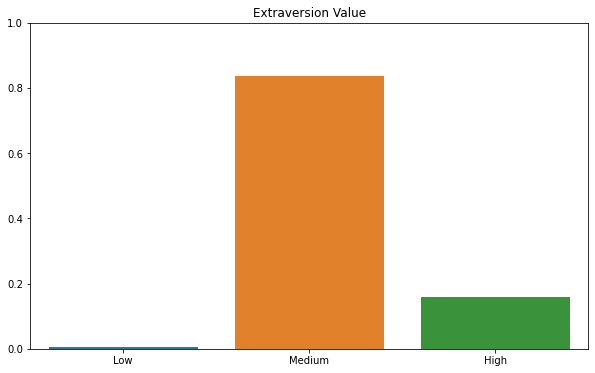

In [30]:
#Extraversion grouped by value
low = 50.0 / 3
len_big_five_data = len(big_five_data)
low_EXT = len(big_five_data[big_five_data.EXT <= low]) / len_big_five_data

medium = 50.0 * 2 / 3

medium_EXT = len(big_five_data[(big_five_data.EXT > low) & (big_five_data.EXT <= medium)]) / len_big_five_data

high_EXT = len(big_five_data[big_five_data.EXT > medium]) / len_big_five_data

plt.figure(figsize=(10,6))
plt.title("Extraversion Value")
sns_diag = sns.barplot(x=['Low', 'Medium', 'High'], y=[low_EXT, medium_EXT, high_EXT])
sns_diag.set(ylim=(0, 1))


[(0.0, 1.0)]

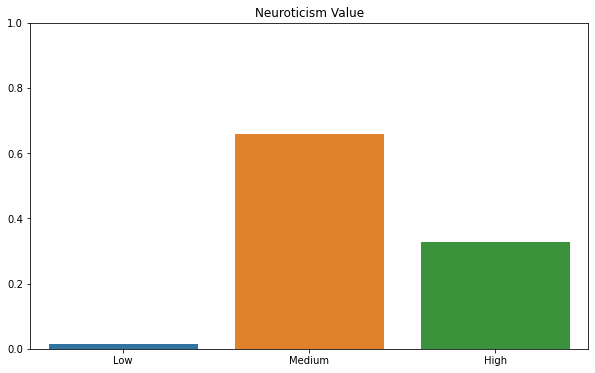

In [31]:
#Neuroticism grouped by value
low_EST = len(big_five_data[big_five_data.EST <= low]) / len_big_five_data
medium_EST = len(big_five_data[(big_five_data.EST > low) & (big_five_data.EST <= medium)]) / len_big_five_data
high_EST = len(big_five_data[big_five_data.EST > medium]) / len_big_five_data
plt.figure(figsize=(10,6))
plt.title("Neuroticism Value")
sns_diag = sns.barplot(x=['Low', 'Medium', 'High'], y=[low_EST, medium_EST, high_EST])
sns_diag.set(ylim=(0, 1))

[(0.0, 1.0)]

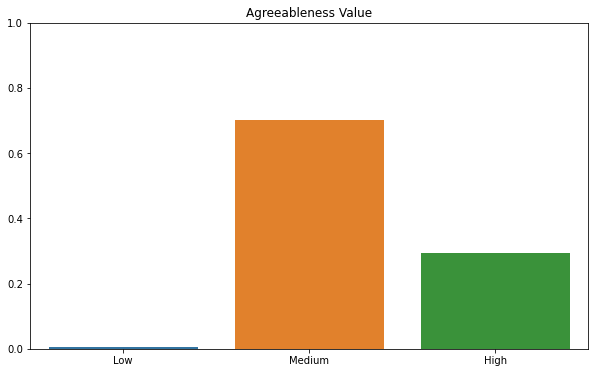

In [32]:
#Agreeableness grouped by value
low_AGR = len(big_five_data[big_five_data.AGR <= low]) / len_big_five_data
medium_AGR = len(big_five_data[(big_five_data.AGR > low) & (big_five_data.AGR <= medium)]) / len_big_five_data
high_AGR = len(big_five_data[big_five_data.AGR > medium]) / len_big_five_data
plt.figure(figsize=(10,6))
plt.title("Agreeableness Value")
sns_diag = sns.barplot(x=['Low', 'Medium', 'High'], y=[low_AGR, medium_AGR, high_AGR])
sns_diag.set(ylim=(0, 1))

[(0.0, 1.0)]

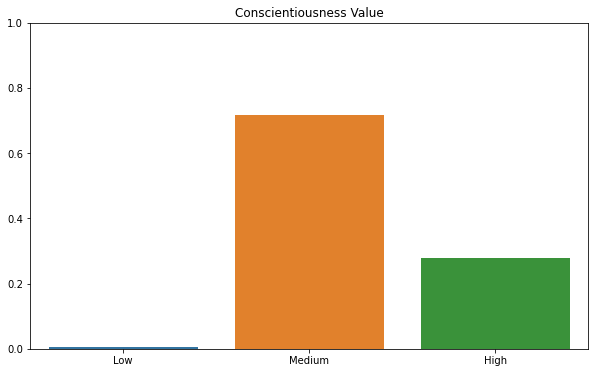

In [33]:
#Conscientiousness grouped by value
low_CSN = len(big_five_data[big_five_data.CSN <= low]) / len_big_five_data
medium_CSN = len(big_five_data[(big_five_data.CSN > low) & (big_five_data.CSN <= medium)]) / len_big_five_data
high_CSN = len(big_five_data[big_five_data.CSN > medium]) / len_big_five_data
plt.figure(figsize=(10,6))
plt.title("Conscientiousness Value")
sns_diag = sns.barplot(x=['Low', 'Medium', 'High'], y=[low_CSN, medium_CSN, high_CSN])
sns_diag.set(ylim=(0, 1))

[(0.0, 1.0)]

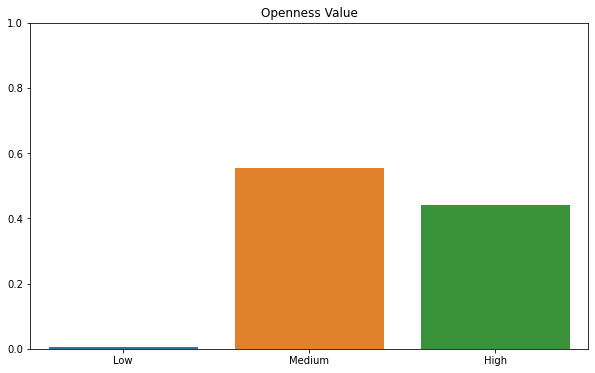

In [34]:
#Openness to Experience grouped by value
low_OPN = len(big_five_data[big_five_data.OPN <= low]) / len_big_five_data
medium_OPN = len(big_five_data[(big_five_data.OPN > low) & (big_five_data.OPN <= medium)]) / len_big_five_data
high_OPN = len(big_five_data[big_five_data.OPN > medium]) / len_big_five_data
plt.figure(figsize=(10,6))
plt.title("Openness Value")
sns_diag = sns.barplot(x=['Low', 'Medium', 'High'], y=[low_OPN, medium_OPN, high_OPN])
sns_diag.set(ylim=(0, 1))

In [35]:
main_big5_data = big_five_data.copy()
main_big5_data = main_big5_data.iloc[:, 51:]
main_big5_data.loc[:, 'ACRS'] = ''
name_columns = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
var_degree = ['1', '2', '3']  #  1 - Low, 2 - Medium, 3 - High
main_big5_data.head()

,EXT,EST,AGR,CSN,OPN,ACRS
0,30.0,24.0,31.0,32.0,33.0,
1,34.0,21.0,32.0,31.0,27.0,
2,29.0,26.0,28.0,28.0,31.0,
3,26.0,27.0,32.0,27.0,31.0,
4,35.0,23.0,30.0,32.0,36.0,


In [42]:
big_five_data.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7,OPN8,OPN9,OPN10,country,EXT,EST,AGR,CSN,OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,3.0,4.0,5.0,GB,30.0,24.0,31.0,32.0,33.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4.0,2.0,5.0,3.0,MY,34.0,21.0,32.0,31.0,27.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,3.0,4.0,4.0,GB,29.0,26.0,28.0,28.0,31.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,4.0,3.0,3.0,GB,26.0,27.0,32.0,27.0,31.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,3.0,5.0,5.0,KE,35.0,23.0,30.0,32.0,36.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,4.0,5.0,2.0,SE,30.0,22.0,28.0,29.0,32.0
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,5.0,5.0,4.0,4.0,US,35.0,30.0,33.0,29.0,37.0
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,...,4.0,3.0,4.0,5.0,MY,30.0,20.0,32.0,33.0,31.0
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,...,5.0,2.0,5.0,5.0,GB,28.0,28.0,29.0,25.0,33.0
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,...,4.0,3.0,3.0,3.0,FI,34.0,31.0,33.0,29.0,27.0


In [56]:
big_five_data.drop(columns=['country']).head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7,OPN8,OPN9,OPN10,country,EXT,EST,AGR,CSN,OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,3.0,4.0,5.0,GB,30.0,24.0,31.0,32.0,33.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4.0,2.0,5.0,3.0,MY,34.0,21.0,32.0,31.0,27.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,3.0,4.0,4.0,GB,29.0,26.0,28.0,28.0,31.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,4.0,3.0,3.0,GB,26.0,27.0,32.0,27.0,31.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,3.0,5.0,5.0,KE,35.0,23.0,30.0,32.0,36.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,4.0,5.0,2.0,SE,30.0,22.0,28.0,29.0,32.0
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,5.0,5.0,4.0,4.0,US,35.0,30.0,33.0,29.0,37.0
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,...,4.0,3.0,4.0,5.0,MY,30.0,20.0,32.0,33.0,31.0
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,...,5.0,2.0,5.0,5.0,GB,28.0,28.0,29.0,25.0,33.0
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,...,4.0,3.0,3.0,3.0,FI,34.0,31.0,33.0,29.0,27.0


In [57]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(big_five_data.drop(columns=['country']))

In [58]:
# Predicting the Clusters
pd.options.display.max_columns = 10

#labels_ is used to identify Labels of each point
predictions = k_fit.labels_
big_five_data['Clusters'] = predictions
big_five_data.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,...,EST,AGR,CSN,OPN,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,24.0,31.0,32.0,33.0,4
1,3.0,5.0,3.0,4.0,3.0,...,21.0,32.0,31.0,27.0,4
2,2.0,3.0,4.0,4.0,3.0,...,26.0,28.0,28.0,31.0,4
3,2.0,2.0,2.0,3.0,4.0,...,27.0,32.0,27.0,31.0,3
4,3.0,3.0,3.0,3.0,5.0,...,23.0,30.0,32.0,36.0,4
5,3.0,3.0,4.0,2.0,4.0,...,22.0,28.0,29.0,32.0,4
6,4.0,3.0,4.0,3.0,3.0,...,30.0,33.0,29.0,37.0,2
7,3.0,1.0,5.0,2.0,5.0,...,20.0,32.0,33.0,31.0,4
8,2.0,2.0,3.0,3.0,4.0,...,28.0,29.0,25.0,33.0,3
9,1.0,5.0,3.0,5.0,2.0,...,31.0,33.0,29.0,27.0,3


In [59]:
big_five_data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,EXT,EST,AGR,CSN,OPN
Clusters,,,,,,,,,,,
0,2.548379,2.871123,2.926772,3.438235,3.118168,...,30.420595,38.532775,32.981158,33.088650,33.758354
1,1.126933,0.837199,0.686641,0.479811,0.340636,...,4.398196,3.807131,4.119201,3.904854,3.587844
2,2.978342,2.576168,3.621658,2.995174,3.659906,...,31.205330,29.745806,32.967338,33.110653,34.652837
3,2.262868,3.039297,2.879100,3.346462,2.815593,...,29.281361,31.398743,29.910542,29.004028,29.912500
4,2.790517,2.669173,3.715073,2.865422,3.516965,...,30.420635,22.356769,30.790089,30.136514,32.654476


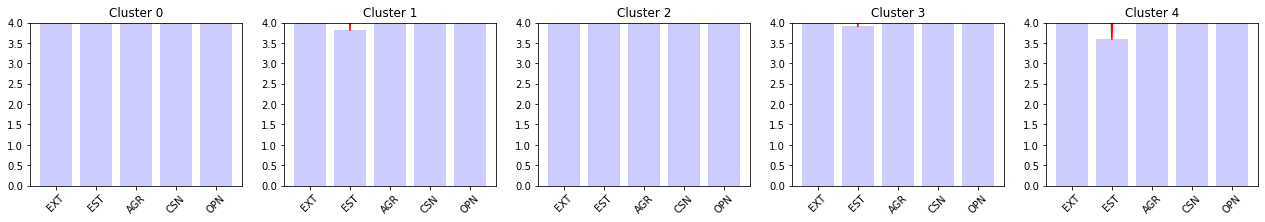

In [63]:
big_five_data.drop(big_five_data.columns.difference(['EXT','EST', 'AGR','CSN','OPN','Clusters']), 1, inplace=True)

# Visualizing the means for each cluster
data_clusters = big_five_data.groupby('Clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='blue', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

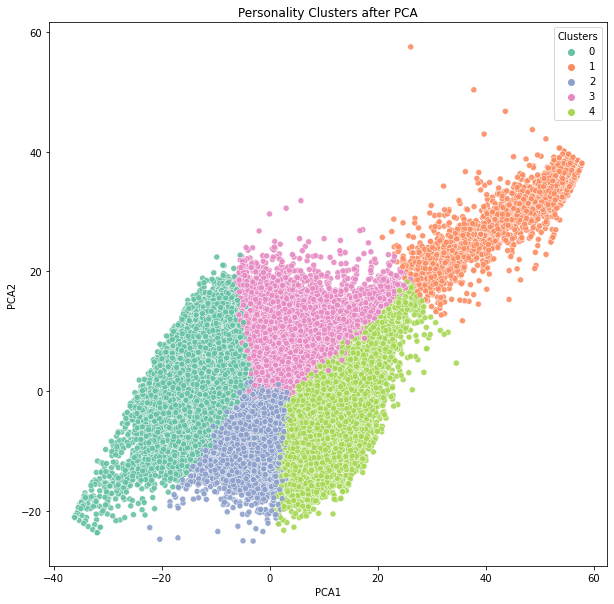

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(big_five_data)

data_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
data_pca['Clusters'] = predictions
data_pca.head()

plt.figure(figsize=(10,10))
sns.scatterplot(data=data_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.9)
plt.title('Personality Clusters after PCA');